# Tutorial completo de cómo programar desde cero una Red Neuronal!

https://www.youtube.com/watch?v=W8AeOXa_FqU

🔬 Este canal forma parte de la red de divulgación de SCENIO. Si quieres conocer otros fantásticos proyectos de divulgación entra aquí:

http://scenio.es/colaboradores

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

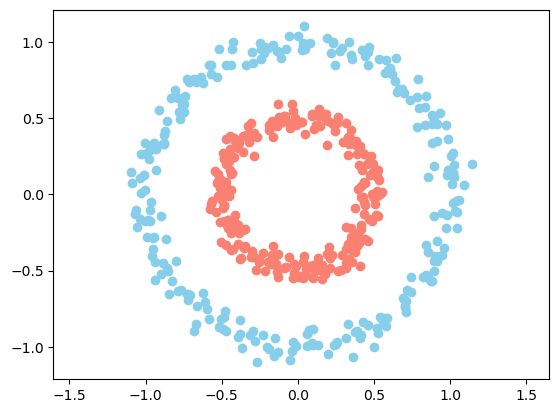

In [69]:
#  CREAR DATASET

n = 500   # muestra, población
p = 2     # características

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]   # si hacemos un shape a Y, sería (500, 0), con newaxis lo convertimos en (500, 1) para usarlo después

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [32]:
# CLASE DE LA CAPA DE RED
class capa_neuronal():
    def __init__(self, n_conexiones, n_neuronas, f_activacion): 
        self.f_activacion = f_activacion
        
        self.b = np.random.rand(1, n_neuronas) * 2 - 1   # random devuelve de 0 a 1, multp. por 2 y restamos 1 para normalizar
        print("b= ", self.b)
        self.W = np.random.rand(n_conexiones, n_neuronas) * 2 - 1  # normalizada, valores de -1 a 1
        print("W= ", self.W)

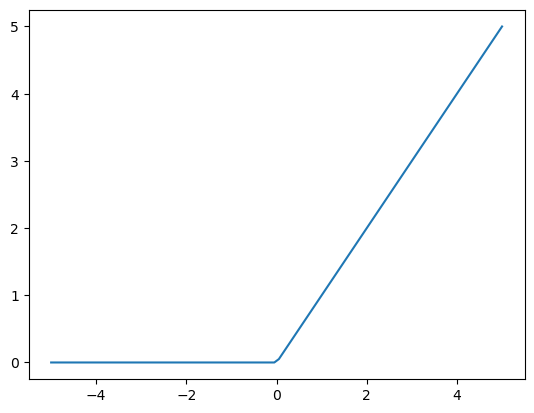

In [27]:
# Función de activación
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

# otras posibles funciones de activación (no la vamos a utilizar)
relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

In [35]:
#  Creación de la red neuronal manualmente (poco eficiente)
l0 = capa_neuronal(p, 4, sigm)
l1 = capa_neuronal(4, 8, sigm)

#  Creación automática a partir de la definición en topologia
topologia = [p, 4, 8, 1]  # primera capa = las características, la segunda 4, .., la última 1 de salida

def crear_red_neuronal(topologia, f_activacion):
    redNeuronal = []
    for l, capa in enumerate(topologia[:-1]):    # recorremos todo menos el último (-1)
        print("l = ", l, "  capa= ", capa)
        redNeuronal. append(capa_neuronal(topologia[l], topologia[l+1], f_activacion))
    return redNeuronal

miRedNeuronal = crear_red_neuronal(topologia, sigm)

b=  [[ 0.18840258  0.67178011 -0.83187387 -0.29816559]]
W=  [[-0.06697987  0.95404652  0.6930473  -0.0050196 ]
 [-0.90049504 -0.81537245 -0.00596862 -0.15740886]]
b=  [[-0.70980908 -0.42517631  0.65843486 -0.94434628  0.77800299 -0.68196396
   0.28026414  0.75467188]]
W=  [[-0.30023702 -0.21679878 -0.18841116 -0.36838325  0.42230368 -0.02083437
  -0.3832368   0.85817717]
 [-0.20031204  0.09870658  0.61397292  0.43299429 -0.87150957 -0.87635655
  -0.59880811  0.28133889]
 [-0.66568674  0.24045584  0.6843951   0.62112365  0.36547003  0.86153163
  -0.63384733 -0.46352529]
 [-0.83228925  0.87649225 -0.01979154 -0.42350492 -0.15767699  0.48337551
  -0.4893483  -0.40468816]]
l =  0   capa=  2
b=  [[-0.0032514  -0.44634425 -0.5047296   0.11582826]]
W=  [[-0.97666145  0.7498044   0.25945312  0.10835571]
 [ 0.98838488 -0.93332808 -0.33756616 -0.92318518]]
l =  1   capa=  4
b=  [[ 0.42290437  0.73425376  0.64104257  0.20727328  0.60679931  0.13073324
   0.07148714 -0.12855193]]
W=  [[ 0.97513924

In [36]:
#  Función de coste = error (diferencia entre predicción Yp y real Yr) cuadrático (** 2) medio (mean)
f_coste = (lambda Yp, Yr: np.mean((Yp- Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))    # derivada de la función de coste

In [71]:
#  Función de entrenamiento de la red neuronal
# Le enseñaremos lo que queremos
# 1) Pasar para alante la información (usando la función de activación) al principio el resultado será aleatorio
# 2) Después compararías con el resultado real calculando la función de coste y valorando el error que llevaremos 
# hacia atrás para mejorar la red neuronal
def Entrenamiento(red_neuronal, X, Y, f_coste, lr=0.5, entrenar=True):  
    # ratio aprendizaje = lr si es muy alto no converge y si es muy pequeño será muy lento
    
    # Forward pass - cogemos los datos de entrada y vamos pasando hacia adelante (suma ponderada + función activación)
    out = [(None, X)]
    for l, capa in enumerate(red_neuronal):
        # @ = multiplica vectorialmente
        z = out[-1][1] @ red_neuronal[l].W + red_neuronal[l].b    # suma ponderada = z
        a = red_neuronal[l].f_activacion[0](z)               # función de activación = a
        out.append((z, a))
    
    print(f_coste[0](out[-1][1], Y))
    
    if entrenar:
        # Backward pass = enseñar, entrenar la red neuronal
        deltas = []
        for l in reversed(range(0, len(red_neuronal))):
            z = out[l+1][0]
            a = out[l+1][1]
            print(a.shape)

            if l == len(red_neuronal) - 1:                           # Calcular delta de la última capa
                deltas.insert(0, f_coste[1](a, Y) * red_neuronal[l].f_activacion[1](a))
            else:                                                    # Calcular delta para el resto de capas
                deltas.insert(0, deltas[0] @ _W * red_neuronal[l].f_activacion[1](a))
                
            _W = red_neuronal[l].W
    
            # Gradient descent  =  hacemos uso de los deltas, "derivadas"
            print(out[l][1].shape, deltas[0].shape)
            red_neuronal[l].b = red_neuronal[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            red_neuronal[l].W = red_neuronal[l].W - out[l][1] @ deltas[0] * lr
            
        return out[-1][1]

Entrenamiento(miRedNeuronal, X, Y, f_coste, 0.5)

0.259867435495948
(500, 500)
(500, 8) (500, 500)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 500 is different from 8)